In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [9]:
n_train = 300     
n_test = 1000  
noise = 0.1

In [10]:
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

In [11]:
X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

In [12]:
%%time
reg_tree = DecisionTreeRegressor(max_depth=10, random_state=17)

reg_tree.fit(X_train, y_train)

# Прогноз на навченій програмі
reg_tree_pred = reg_tree.predict(X_test)

Wall time: 0 ns


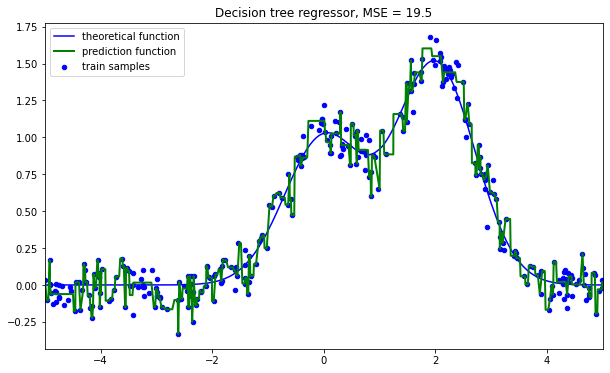

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b", label='theoretical function')
plt.scatter(X_train, y_train, c="b", s=20, label='train samples')
plt.plot(X_test, reg_tree_pred, "g", lw=2, label='prediction function')
plt.xlim([-5, 5])
plt.title(f"Decision tree regressor, MSE = {round(np.sum((y_test - reg_tree_pred) ** 2),2)}")
plt.legend(loc=2)
plt.show()